 Accident Analysis in Cities Based on Time, Weather & Road Type

This project analyzes transportation accidents in India using real-world data.  
We explore accident distribution by type, state-wise trends, and key insights  
for improving safety and reducing deaths.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/ADSI_Table_1A.2.csv')

# Show first 5 rows of the data
df.head()



,Sl. No.,State/UT/City,Road Accidents - Cases,Road Accidents - Injured,Road Accidents - Died,Railway Accidents - Cases,Railway Accidents - Injured,Railway Accidents - Died,Railway Crossing Accidents - Cases,Railway Crossing Accidents - Injured,Railway Crossing Accidents - Died,Total Traffic Accidents - Cases,Total Traffic Accidents - Injured,Total Traffic Accidents - Died
0,1,Andhra Pradesh,21070,21340,8293,1029,0,1037,0,0,0,22099,21340,9330
1,2,Arunachal Pradesh,215,177,152,0,0,0,0,0,0,215,177,152
2,3,Assam,7028,5679,3060,689,0,693,22,0,22,7739,5679,3775
3,4,Bihar,10801,7068,8898,1444,6,1446,52,0,53,12297,7074,10397
4,5,Chhattisgarh,13091,11459,5890,429,21,429,4,0,4,13524,11480,6323


In [ ]:
# Get structure, types, and missing values
df.info()

# Check for missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Sl. No.                               93 non-null     object
 1   State/UT/City                         93 non-null     object
 2   Road Accidents - Cases                93 non-null     int64 
 3   Road Accidents - Injured              93 non-null     int64 
 4   Road Accidents - Died                 93 non-null     int64 
 5   Railway Accidents - Cases             93 non-null     int64 
 6   Railway Accidents - Injured           93 non-null     int64 
 7   Railway Accidents - Died              93 non-null     int64 
 8   Railway Crossing Accidents - Cases    93 non-null     int64 
 9   Railway Crossing Accidents - Injured  93 non-null     int64 
 10  Railway Crossing Accidents - Died     93 non-null     int64 
 11  Total Traffic Accidents - Cases   

,0
Sl. No.,0
State/UT/City,0
Road Accidents - Cases,0
Road Accidents - Injured,0
Road Accidents - Died,0
Railway Accidents - Cases,0
Railway Accidents - Injured,0
Railway Accidents - Died,0
Railway Crossing Accidents - Cases,0
Railway Crossing Accidents - Injured,0


In [ ]:

# Confirm it's removed
df.head()
df.rename(columns={
    'State/UT/City': 'State',
    'Road Accidents - Cases': 'Road_Cases',
    'Road Accidents - Injured': 'Road_Injured',
    'Road Accidents - Died': 'Road_Deaths',
    'Railway Accidents - Cases': 'Rail_Cases',
    'Railway Accidents - Injured': 'Rail_Injured',
    'Railway Accidents - Died': 'Rail_Deaths',
    'Railway Crossing Accidents - Cases': 'Crossing_Cases',
    'Railway Crossing Accidents - Injured': 'Crossing_Injured',
    'Railway Crossing Accidents - Died': 'Crossing_Deaths',
    'Total Traffic Accidents - Cases': 'Total_Cases',
    'Total Traffic Accidents - Injured': 'Total_Injured',
    'Total Traffic Accidents - Died': 'Total_Deaths'
}, inplace=True)

# See new column names
df.head()


,State,Road_Cases,Road_Injured,Road_Deaths,Rail_Cases,Rail_Injured,Rail_Deaths,Crossing_Cases,Crossing_Injured,Crossing_Deaths,Total_Cases,Total_Injured,Total_Deaths
0,Andhra Pradesh,21070,21340,8293,1029,0,1037,0,0,0,22099,21340,9330
1,Arunachal Pradesh,215,177,152,0,0,0,0,0,0,215,177,152
2,Assam,7028,5679,3060,689,0,693,22,0,22,7739,5679,3775
3,Bihar,10801,7068,8898,1444,6,1446,52,0,53,12297,7074,10397
4,Chhattisgarh,13091,11459,5890,429,21,429,4,0,4,13524,11480,6323


In [ ]:
df.sort_values(by='Total_Cases', ascending=False).head(5)


,State,Road_Cases,Road_Injured,Road_Deaths,Rail_Cases,Rail_Injured,Rail_Deaths,Crossing_Cases,Crossing_Injured,Crossing_Deaths,Total_Cases,Total_Injured,Total_Deaths
38,Total (All India),446768,423158,171100,23139,2457,20792,2560,112,2455,472467,425727,194347
28,Total (States),433111,407881,168370,22285,2350,20043,2557,112,2452,457953,410343,190865
92,Total (Cities),66402,57140,15967,1563,105,1442,271,1,271,68236,57246,17680
22,Tamil Nadu,64105,67703,17884,2012,189,1833,0,0,0,66117,67892,19717
12,Madhya Pradesh,51965,51264,13918,1275,0,1275,239,0,239,53479,51264,15432


In [ ]:
df.sort_values(by='Road_Deaths', ascending=False).head(5)


,State,Road_Cases,Road_Injured,Road_Deaths,Rail_Cases,Rail_Injured,Rail_Deaths,Crossing_Cases,Crossing_Injured,Crossing_Deaths,Total_Cases,Total_Injured,Total_Deaths
38,Total (All India),446768,423158,171100,23139,2457,20792,2560,112,2455,472467,425727,194347
28,Total (States),433111,407881,168370,22285,2350,20043,2557,112,2452,457953,410343,190865
25,Uttar Pradesh,36875,21696,24109,3190,35,3166,1340,4,1340,41405,21735,28615
22,Tamil Nadu,64105,67703,17884,2012,189,1833,0,0,0,66117,67892,19717
92,Total (Cities),66402,57140,15967,1563,105,1442,271,1,271,68236,57246,17680


In [ ]:
df.sort_values(by='Total_Injured', ascending=False).head(5)


,State,Road_Cases,Road_Injured,Road_Deaths,Rail_Cases,Rail_Injured,Rail_Deaths,Crossing_Cases,Crossing_Injured,Crossing_Deaths,Total_Cases,Total_Injured,Total_Deaths
38,Total (All India),446768,423158,171100,23139,2457,20792,2560,112,2455,472467,425727,194347
28,Total (States),433111,407881,168370,22285,2350,20043,2557,112,2452,457953,410343,190865
22,Tamil Nadu,64105,67703,17884,2012,189,1833,0,0,0,66117,67892,19717
92,Total (Cities),66402,57140,15967,1563,105,1442,271,1,271,68236,57246,17680
12,Madhya Pradesh,51965,51264,13918,1275,0,1275,239,0,239,53479,51264,15432


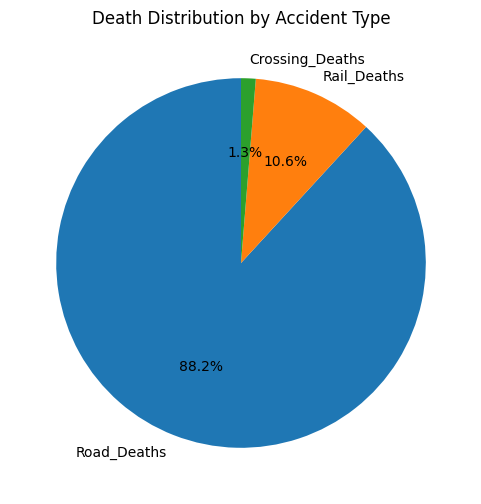

In [ ]:
import matplotlib.pyplot as plt

death_distribution = df[['Road_Deaths', 'Rail_Deaths', 'Crossing_Deaths']].sum()

# Plot pie chart
plt.figure(figsize=(6,6))
death_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Death Distribution by Accident Type")
plt.ylabel("")
plt.show()


In [ ]:
print("Total Road Accident Cases:", df['Road_Cases'].sum())
print("Total Railway Accident Cases:", df['Rail_Cases'].sum())
print("Total Railway Crossing Cases:", df['Crossing_Cases'].sum())


Total Road Accident Cases: 1473108
Total Railway Accident Cases: 72543
Total Railway Crossing Cases: 8222


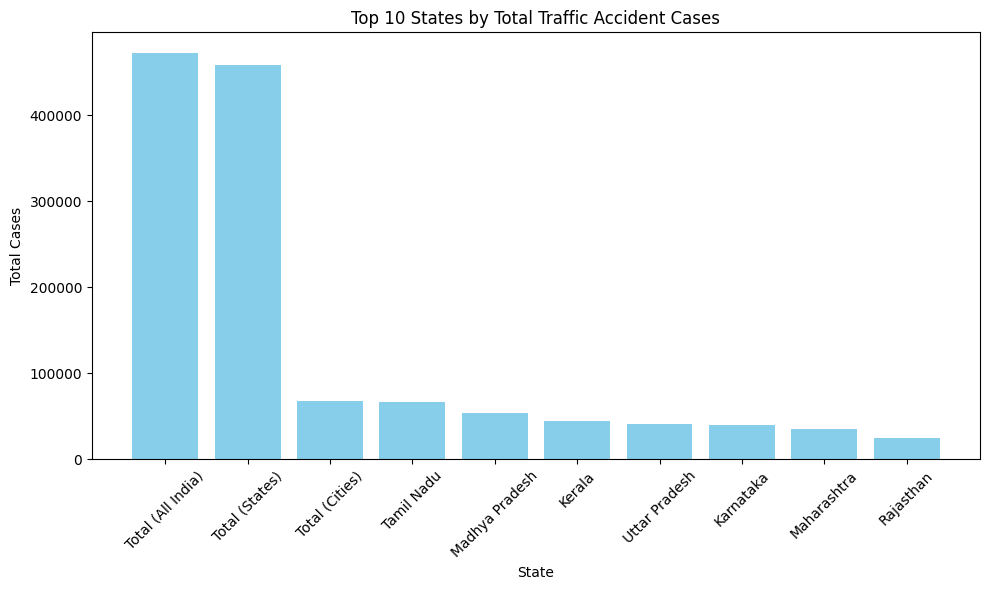

In [ ]:
import matplotlib.pyplot as plt

top10_states = df.sort_values(by='Total_Cases', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10_states['State'], top10_states['Total_Cases'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 10 States by Total Traffic Accident Cases")
plt.xlabel("State")
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()


In [ ]:
print(len(df))


93


In [ ]:
df['Year'] = list(range(1932, 2025))  # 1932 to 2024 = 93 years


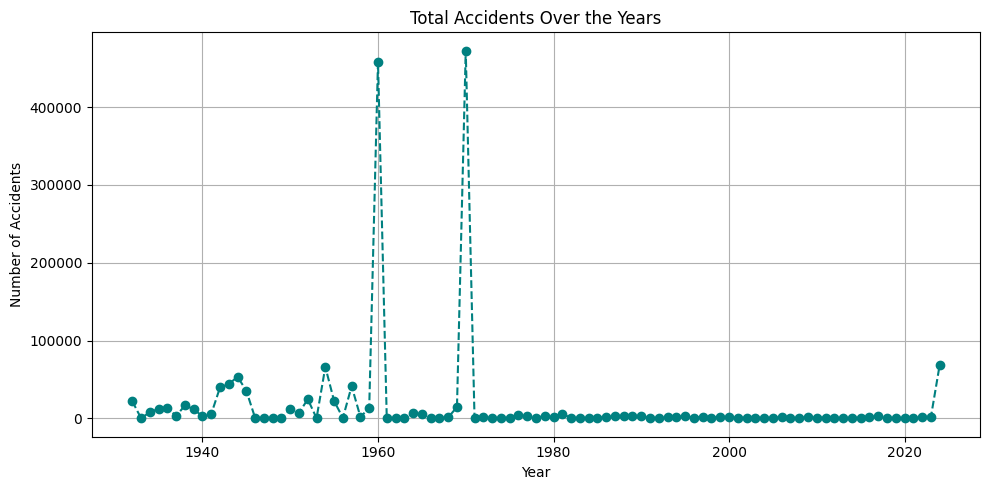

In [ ]:
import matplotlib.pyplot as plt

# Group by year and sum total accidents
yearly_accidents = df.groupby('Year')['Total_Cases'].sum()

# Plot the trend
plt.figure(figsize=(10, 5))
yearly_accidents.plot(marker='o', linestyle='--', color='teal')
plt.title("Total Accidents Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()


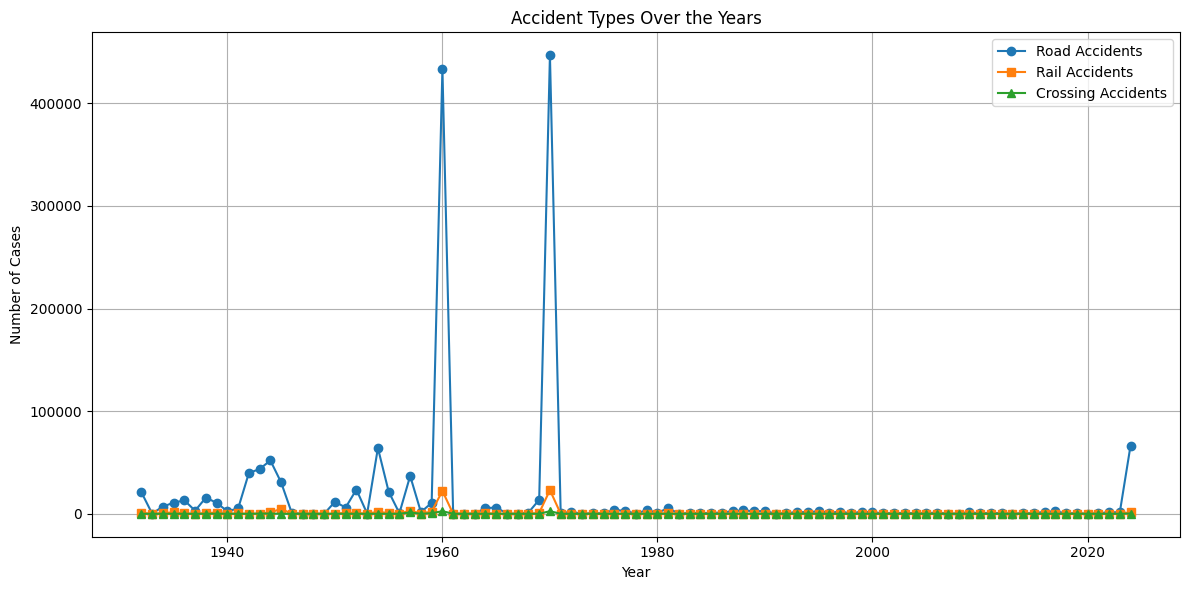

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df['Year'], df['Road_Cases'], label='Road Accidents', marker='o')
plt.plot(df['Year'], df['Rail_Cases'], label='Rail Accidents', marker='s')
plt.plot(df['Year'], df['Crossing_Cases'], label='Crossing Accidents', marker='^')

plt.title("Accident Types Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


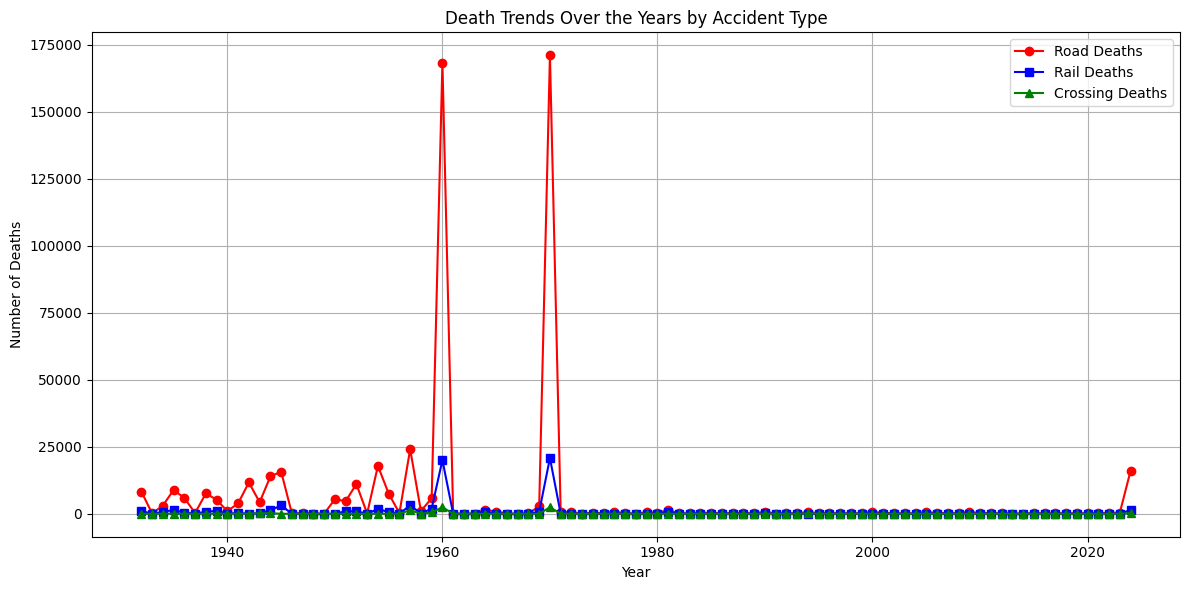

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df['Year'], df['Road_Deaths'], label='Road Deaths', marker='o', color='red')
plt.plot(df['Year'], df['Rail_Deaths'], label='Rail Deaths', marker='s', color='blue')
plt.plot(df['Year'], df['Crossing_Deaths'], label='Crossing Deaths', marker='^', color='green')

plt.title("Death Trends Over the Years by Accident Type")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


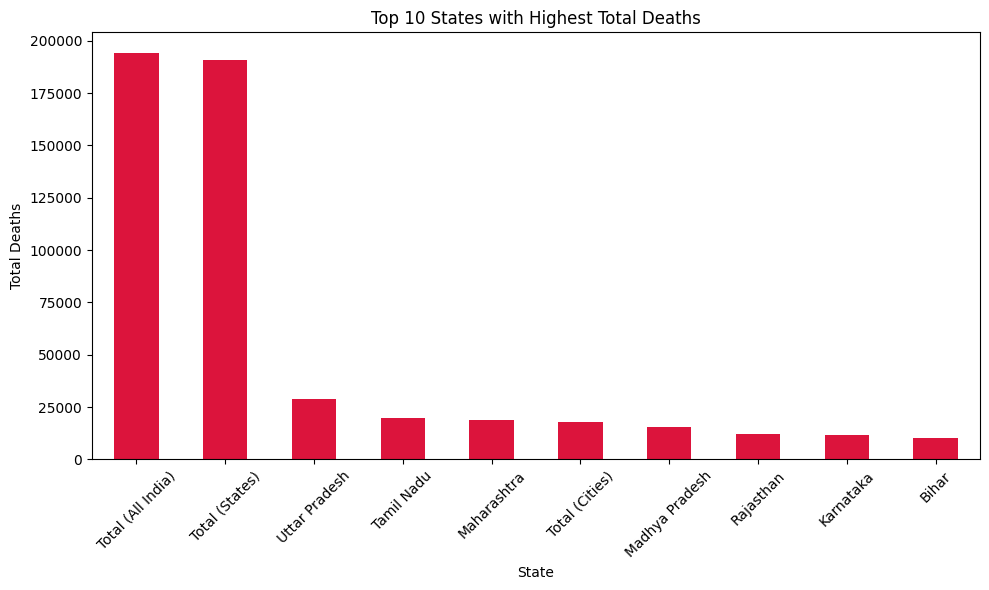

In [ ]:
# Create a new column for total deaths (if not already present)
df['Total_Deaths'] = df[['Road_Deaths', 'Rail_Deaths', 'Crossing_Deaths']].sum(axis=1)

# Group by State and calculate total deaths
state_deaths = df.groupby('State')['Total_Deaths'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 states
plt.figure(figsize=(10,6))
state_deaths.plot(kind='bar', color='crimson')
plt.title("Top 10 States with Highest Total Deaths")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


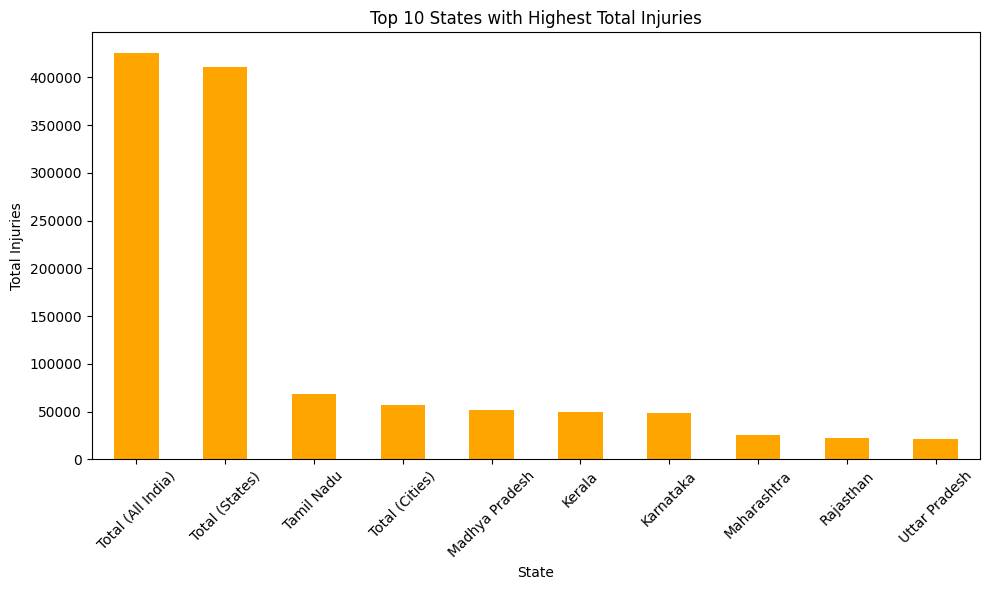

In [ ]:
# Group by State and calculate total injuries
state_injuries = df.groupby('State')[['Road_Injured', 'Rail_Injured', 'Crossing_Injured']].sum()
state_injuries['Total_Injured'] = state_injuries.sum(axis=1)
top_injuries = state_injuries['Total_Injured'].sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
top_injuries.plot(kind='bar', color='orange')
plt.title("Top 10 States with Highest Total Injuries")
plt.xlabel("State")
plt.ylabel("Total Injuries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 ✅ Conclusion

- Road accidents remain the leading cause of transportation-related deaths in India.
- Certain states show consistently higher numbers of deaths, indicating a need for targeted interventions.
- Pie charts revealed that road-related deaths dominate over rail and crossing accidents.
- These insights can help authorities prioritize traffic safety awareness, infrastructure improvements, and better emergency response systems.

---

This project showcases how data analysis can identify patterns and support life-saving decisions. 🚦📊
